Binary Classification of Mushrooms into edible and poisonous evaluating different ML models. Dataset taken from 

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [20]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/mushroom_cleaned.csv")
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [21]:
data["class"].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [22]:
scaller = MinMaxScaler()
data_to_scale = ["cap-diameter", "cap-shape", "gill-attachment", "gill-color", "stem-height", "stem-width", "stem-color", "season"]

for column in data_to_scale:
    data[column] = scaller.fit_transform(data[[column]])

In [23]:
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000,1
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000,1
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000,1
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000,1
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404,1
...,...,...,...,...,...,...,...,...,...
54030,0.038604,0.833333,0.500000,0.181818,0.231379,0.159428,1.000000,0.515404,1
54031,0.043363,0.333333,0.500000,0.181818,0.309197,0.137293,1.000000,0.515404,1
54032,0.043363,0.833333,0.500000,0.181818,0.238642,0.163631,1.000000,0.484596,1
54033,0.041777,0.333333,0.500000,0.181818,0.269769,0.137574,1.000000,0.484596,1


In [24]:
x = data.drop("class", axis="columns")
y = data["class"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [26]:
# model_1 = LogisticRegression()
# cross_val_score(model_1, x, y)

array([0.68983067, 0.37540483, 0.59267142, 0.62515037, 0.61127047])

In [27]:
# model_2 = DecisionTreeClassifier()
# cross_val_score(model_2, x, y)

array([0.54011289, 0.46719719, 0.5427038 , 0.54908855, 0.59294901])

In [28]:
# model_3 = SVC()
# cross_val_score(model_3, x, y)

array([0.60932729, 0.45239197, 0.54992135, 0.43397798, 0.58989544])

In [29]:
# choosed model 
model_4 = KNeighborsClassifier()
cross_val_score(model_4, x, y)

array([0.54122328, 0.53252522, 0.62431757, 0.60969742, 0.48949755])

In [30]:
# model_5 = RandomForestClassifier()
# cross_val_score(model_5, x, y)

array([0.56407884, 0.4868141 , 0.56250578, 0.49199593, 0.57268437])

In [31]:
model_4.fit(x_train, y_train)

model_4.score(x_test, y_test)

0.9899139446654945

In [32]:
preds = model_4.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1])

In [33]:
preds_frame = pd.DataFrame({"Actuals": y_test.squeeze(), "Predictions": preds.squeeze()})
preds_frame

,Actuals,Predictions
19586,0,0
30187,0,0
53149,1,1
39466,0,0
11524,0,0
...,...,...
47006,0,0
6263,1,1
47255,0,0
46356,0,0


In [34]:
cm = confusion_matrix(y_test, preds)
cm

array([[4737,   54],
       [  55, 5961]])

Text(0.5, 36.72222222222221, 'Actuals')

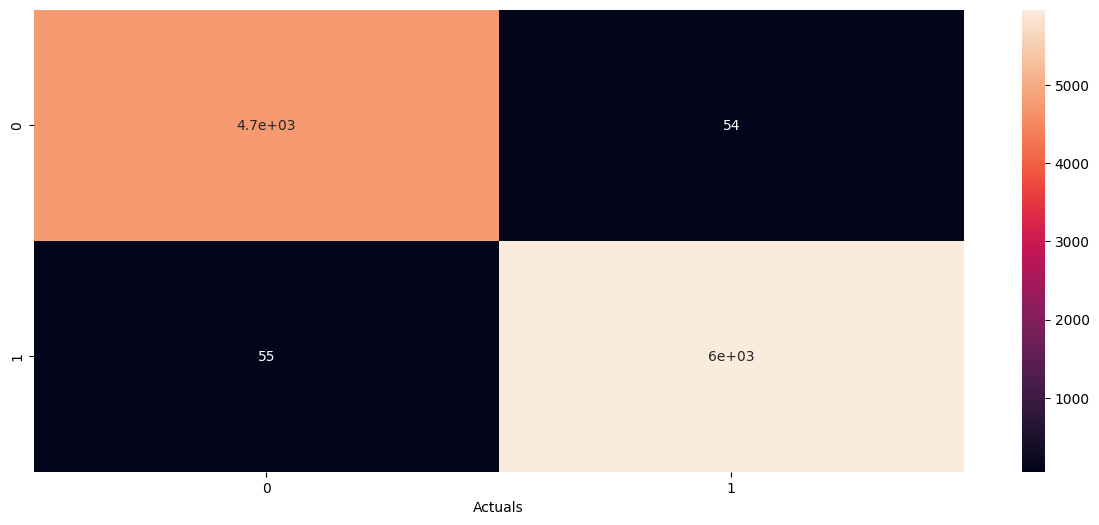

In [39]:
plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions")
plt.xlabel("Actuals")
